# Imports 

In [1]:
import duckdb
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Table to analyze

In [2]:
# Connect to diamonds_train.db and show the tables within the database

con = duckdb.connect('../data/diamonds_train.db')
con.sql("SHOW TABLES")

┌───────────────────────────────────────────┐
│                   name                    │
│                  varchar                  │
├───────────────────────────────────────────┤
│ diamonds_city                             │
│ diamonds_clarity                          │
│ diamonds_color                            │
│ diamonds_cut                              │
│ diamonds_dimensions                       │
│ diamonds_properties                       │
│ diamonds_transactional                    │
│ sqlite_autoindex_diamonds_city_1          │
│ sqlite_autoindex_diamonds_clarity_1       │
│ sqlite_autoindex_diamonds_color_1         │
│ sqlite_autoindex_diamonds_cut_1           │
│ sqlite_autoindex_diamonds_dimensions_1    │
│ sqlite_autoindex_diamonds_properties_1    │
│ sqlite_autoindex_diamonds_transactional_1 │
├───────────────────────────────────────────┤
│                  14 rows                  │
└───────────────────────────────────────────┘

In [3]:
con.sql('DESCRIBE')

┌────────────────────────┬──────────────────────────────────────────┬───────────────────────────────────────────────────┬───────────┐
│       table_name       │               column_names               │                   column_types                    │ temporary │
│        varchar         │                varchar[]                 │                     varchar[]                     │  boolean  │
├────────────────────────┼──────────────────────────────────────────┼───────────────────────────────────────────────────┼───────────┤
│ diamonds_city          │ [city_id, city]                          │ [VARCHAR, VARCHAR]                                │ false     │
│ diamonds_clarity       │ [clarity_id, clarity]                    │ [VARCHAR, VARCHAR]                                │ false     │
│ diamonds_color         │ [color_id, color]                        │ [VARCHAR, VARCHAR]                                │ false     │
│ diamonds_cut           │ [cut_id, cut]                      

In [4]:
#Get all the tables and turn them into a Pandas dataframe

city = con.sql("SELECT * FROM  diamonds_city").df()
clarity = con.sql("SELECT * FROM  diamonds_clarity").df()
color = con.sql("SELECT * FROM  diamonds_color").df()
cut = con.sql("SELECT * FROM  diamonds_cut").df()
dimensions = con.sql("SELECT * FROM  diamonds_dimensions").df()
properties = con.sql("SELECT * FROM  diamonds_properties").df()
transactional = con.sql("SELECT * FROM  diamonds_transactional").df()

In [5]:
#MMerge "Properties" with corresponding tables

properties = pd.merge(properties, cut, on='cut_id')
properties = pd.merge(properties, color, on='color_id')
properties = pd.merge(properties, clarity, on='clarity_id')
properties = properties.loc[:, ['index_id','cut','color','clarity']]

#Merge "Transactional" with corresponding tables

transactional = pd.merge(transactional, city, on='city_id')
transactional = transactional.loc[:, ['index_id','price','carat','city']]

In [6]:
#Merge "Properties", "Transactional" and "Dimensions" to get the final analysis table

diamonds = pd.merge(transactional, properties, on='index_id')
diamonds = pd.merge(diamonds, dimensions, on='index_id')
diamonds

,index_id,price,carat,city,cut,color,clarity,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,1.21,Dubai,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25
1,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,1.02,Dubai,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95
2,76a50887d8f1c2e9301755428990ad81479ee21c25b432...,14208,2.00,Dubai,Premium,I,SI2,61.3,59.0,8.13,8.09,4.97
3,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,5113,1.01,Dubai,Good,G,SI1,63.7,60.0,6.32,6.28,4.01
4,3ada92f28b4ceda38562ebf047c6ff05400d4c572352a1...,2898,0.79,Dubai,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,108946d54dc1fe83dc9bc2f6473638fcb5a67b56fad11f...,2343,0.70,New York City,Ideal,I,SI1,61.2,55.0,5.71,5.76,3.51
40451,1c3df646e5dc628e7105486ae80ab1d4cab77833e00532...,1120,0.52,New York City,Very Good,E,SI2,62.9,56.0,5.12,5.15,3.23
40452,651202fa2183f4e9ca8eead69d4c88509d5a8b77c071ba...,789,0.30,New York City,Ideal,H,IF,61.8,55.0,4.30,4.31,2.66
40453,02fec877e61887d52c89655be4b39b948dc8cfe9842971...,1452,0.59,New York City,Very Good,F,SI1,62.4,59.0,5.33,5.37,3.34


# EDA

In [7]:
# Diamonds dataframe info

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   price     40455 non-null  int64  
 2   carat     40455 non-null  float64
 3   city      40455 non-null  object 
 4   cut       40455 non-null  object 
 5   color     40455 non-null  object 
 6   clarity   40455 non-null  object 
 7   depth     40455 non-null  float64
 8   table     40455 non-null  float64
 9   x         40455 non-null  float64
 10  y         40455 non-null  float64
 11  z         40455 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.0+ MB


### Descriptive Statistics

In [16]:
# Descriptives, median and mode

display(diamonds.describe())
display(pd.DataFrame(diamonds.median(numeric_only=True)).transpose().rename(index={0: "median"}))
display(diamonds.loc[:, ['price',
                 'carat',
                 'city',
                 'cut',
                 'color',
                 'clarity',
                 'depth',
                 'table',
                 'x',
                 'y',
                 'z']].mode().head(1).rename(index={0: "mode"}))

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


,price,carat,depth,table,x,y,z
median,2397.0,0.7,61.8,57.0,5.69,5.71,3.52


,price,carat,city,cut,color,clarity,depth,table,x,y,z
mode,605,0.3,Surat,Ideal,G,SI1,61.9,56.0,4.37,4.37,2.69


### Proportions and barcharts for categorical variables

,color,%
G,8455,0.208998
E,7325,0.181065
F,7177,0.177407
H,6277,0.155160
D,5049,0.124805
I,4032,0.099666
J,2140,0.052898


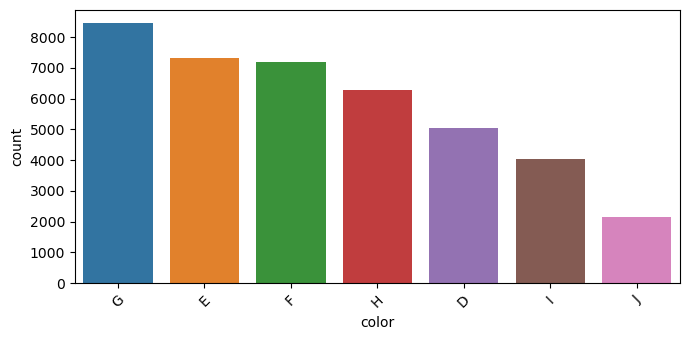

In [17]:
# Color

color_proportions = diamonds.color.value_counts()
color_proportions = pd.DataFrame(color_proportions)
color_proportions['%'] = (color_proportions['color']/sum(color_proportions['color']))
display(color_proportions)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

color_count = diamonds['color'].value_counts()
color_count.index
color_count_df = pd.DataFrame({'color':color_count.index, 'count':color_count.values})
color_count_df
ax = sns.barplot(x='color', y='count', data=color_count_df, orient='v')
ax.set_xticklabels(color_count_df['color'], rotation=45)
plt.show()

,clarity,%
SI1,9749,0.240984
VS2,9248,0.228600
SI2,6929,0.171277
VS1,6066,0.149944
VVS2,3799,0.093907
VVS1,2774,0.068570
IF,1327,0.032802
I1,563,0.013917


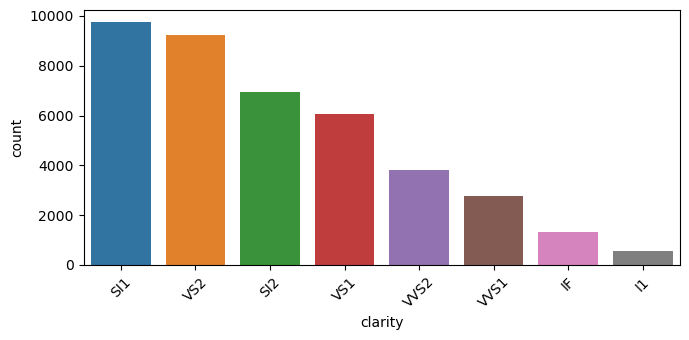

In [18]:
# Clarity

clarity_proportions = diamonds.clarity.value_counts()
clarity_proportions = pd.DataFrame(clarity_proportions)
clarity_proportions['%'] = (clarity_proportions['clarity']/sum(clarity_proportions['clarity']))
display(clarity_proportions)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

clarity_count = diamonds['clarity'].value_counts()
clarity_count.index
clarity_count_df = pd.DataFrame({'clarity':clarity_count.index, 'count':clarity_count.values})
clarity_count_df
ax = sns.barplot(x='clarity', y='count', data=clarity_count_df, orient='v')
ax.set_xticklabels(clarity_count_df['clarity'], rotation=45)
plt.show()

,city,%
Surat,5073,0.125399
Antwerp,5047,0.124756
Kimberly,4976,0.123001
Luxembourg,2606,0.064417
Las Vegas,2586,0.063923
New York City,2586,0.063923
Dubai,2561,0.063305
Madrid,2540,0.062786
Paris,2530,0.062539
Tel Aviv,2505,0.061921


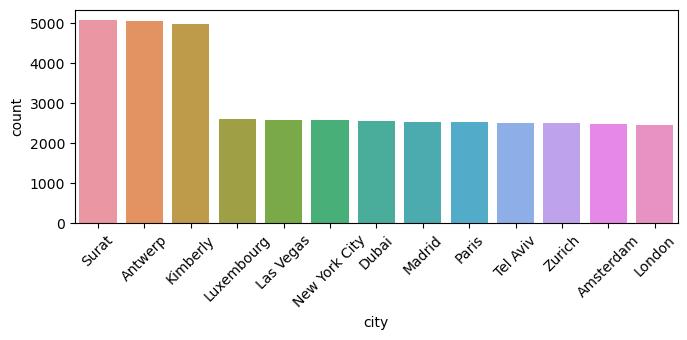

In [19]:
# City

city_proportions = diamonds.city.value_counts()
city_proportions = pd.DataFrame(city_proportions)
city_proportions['%'] = (city_proportions['city']/sum(city_proportions['city']))
display(city_proportions)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

city_count = diamonds['city'].value_counts()
city_count.index
city_count_df = pd.DataFrame({'city':city_count.index, 'count':city_count.values})
city_count_df
ax = sns.barplot(x='city', y='count', data=city_count_df, orient='v')
ax.set_xticklabels(city_count_df['city'], rotation=45)
plt.show()

,cut,%
Ideal,16220,0.400939
Premium,10260,0.253615
Very Good,9095,0.224818
Good,3663,0.090545
Fair,1217,0.030083


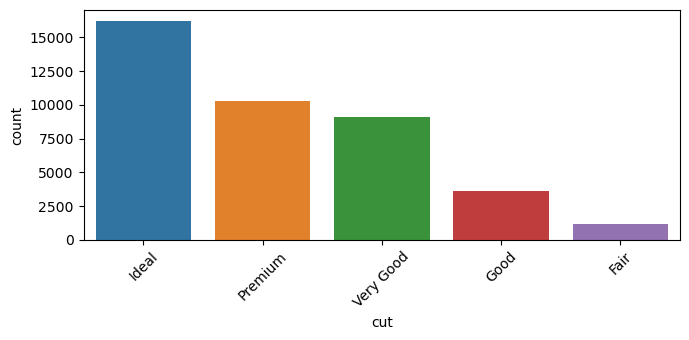

In [20]:
# Cut

cut_proportions = diamonds.cut.value_counts()
cut_proportions = pd.DataFrame(cut_proportions)
cut_proportions['%'] = (cut_proportions['cut']/sum(cut_proportions['cut']))
display(cut_proportions)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

cut_count = diamonds['cut'].value_counts()
cut_count.index
cut_count_df = pd.DataFrame({'cut':cut_count.index, 'count':cut_count.values})
cut_count_df
ax = sns.barplot(x='cut', y='count', data=cut_count_df, orient='v')
ax.set_xticklabels(cut_count_df['cut'], rotation=45)
plt.show()

### Histograms of numerical variables

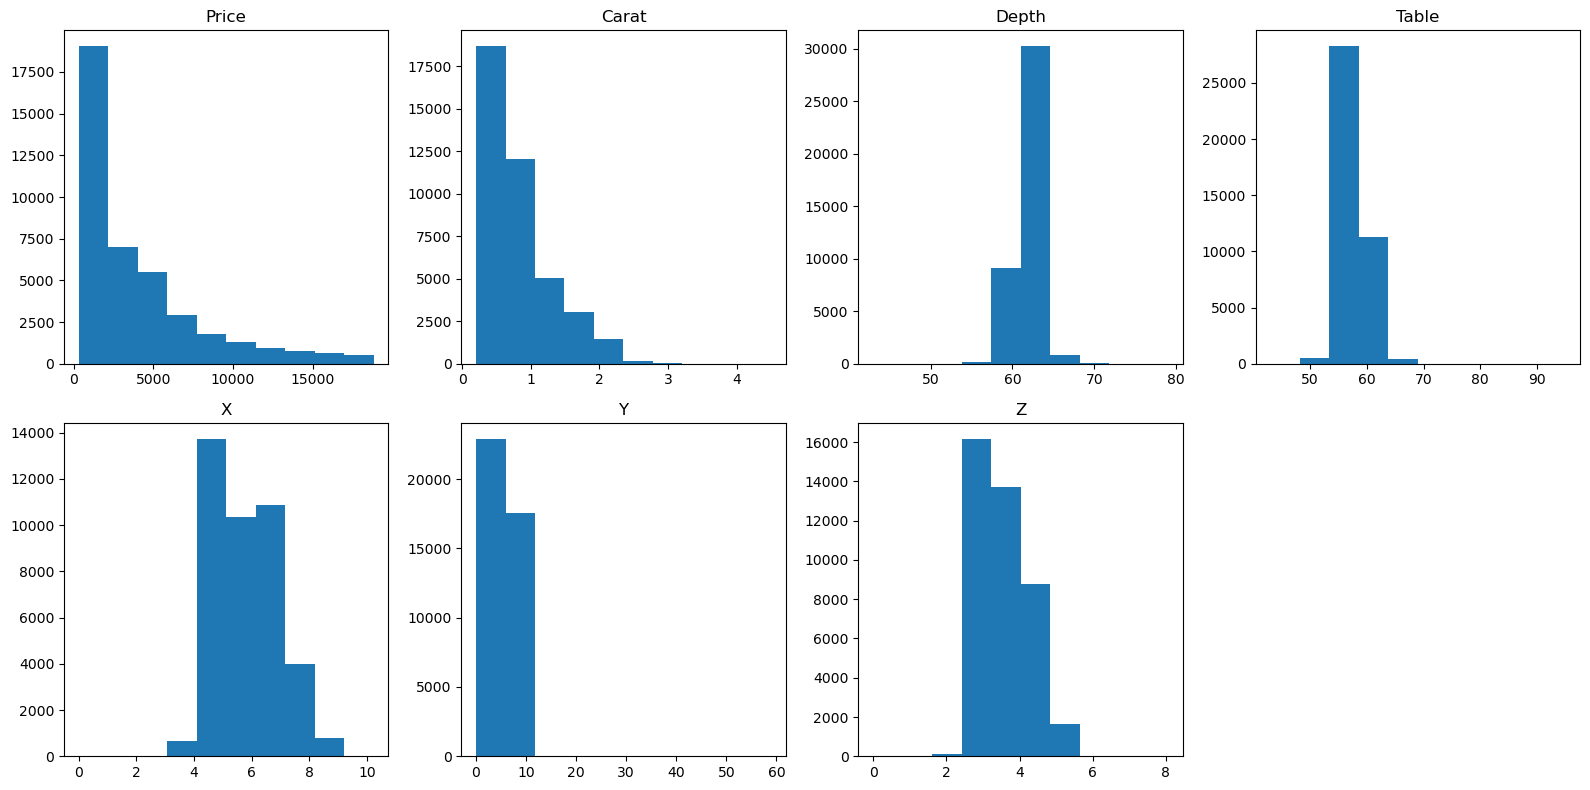

In [30]:
# Create a figure with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Plot each histogram on a separate subplot
axs[0, 0].hist(diamonds['price'])
axs[0, 0].set_title('Price')
axs[0, 1].hist(diamonds['carat'])
axs[0, 1].set_title('Carat')
axs[0, 2].hist(diamonds['depth'])
axs[0, 2].set_title('Depth')
axs[0, 3].hist(diamonds['table'])
axs[0, 3].set_title('Table')
axs[1, 0].hist(diamonds['x'])
axs[1, 0].set_title('X')
axs[1, 1].hist(diamonds['y'])
axs[1, 1].set_title('Y')
axs[1, 2].hist(diamonds['z'])
axs[1, 2].set_title('Z')

# Hide the last subplot to make the layout symmetrical
axs[1, 3].set_visible(False)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Display the plot
plt.show()

### Boxplot for categorical variables vs. Price

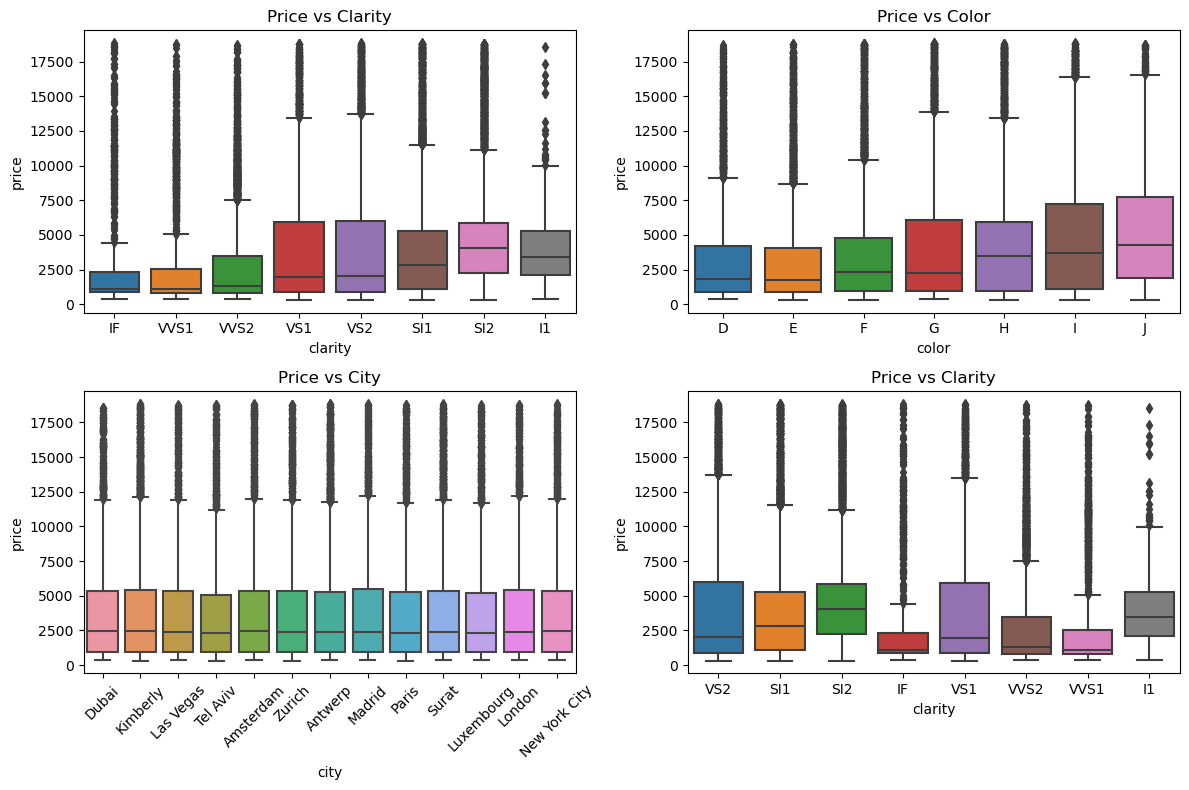

In [51]:
# Define custom order for clarity and color
custom_order_clarity = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']
custom_order_color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot each boxplot on a separate subplot and add a title
sns.boxplot(data=diamonds, x='clarity', y='price', order=custom_order_clarity, ax=axs[0, 0])
axs[0, 0].set_title('Price vs Clarity')

sns.boxplot(data=diamonds, x='color', y='price', order=custom_order_color, ax=axs[0, 1])
axs[0, 1].set_title('Price vs Color')

sns.boxplot(data=diamonds, x='city', y='price', ax=axs[1, 0])
axs[1, 0].set_title('Price vs City')
axs[1, 0].tick_params(axis='x', labelrotation=45)

sns.boxplot(data=diamonds, x='clarity', y='price', ax=axs[1, 1])
axs[1, 1].set_title('Price vs Clarity')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Display the plot
plt.show()


### Correlations and relationship of numerical variables with price 

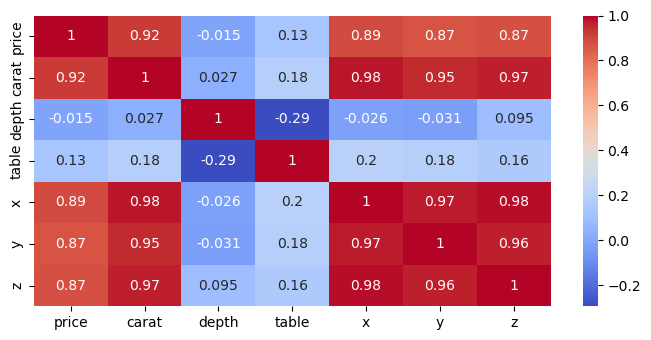

In [52]:
corr = diamonds.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

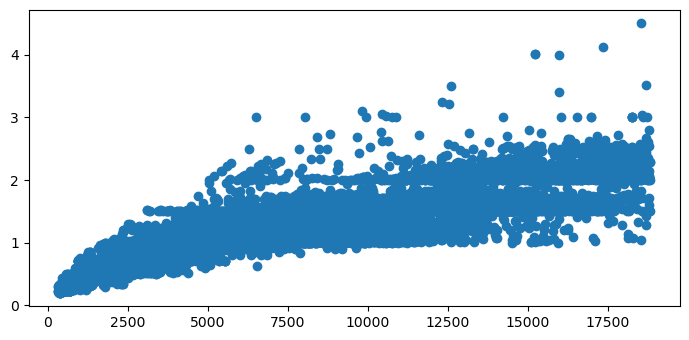

In [34]:
plt.scatter(data=diamonds, 
            x='price', 
            y='carat')
plt.show()

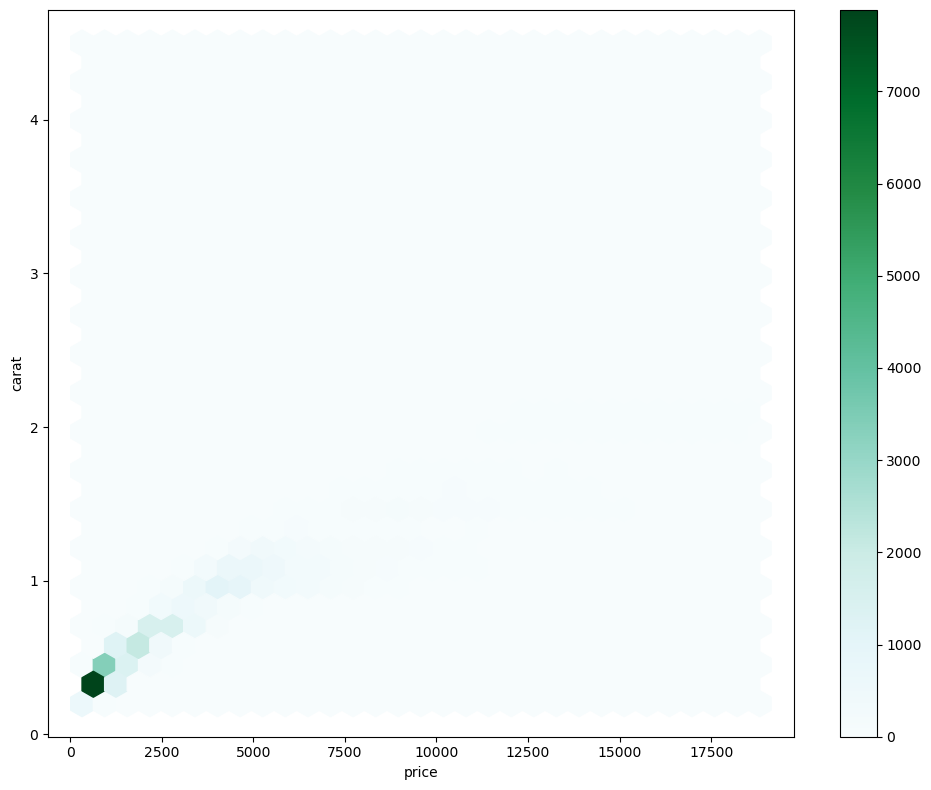

In [35]:
ax = diamonds.plot.hexbin(x='price',
                         y='carat',
                         gridsize=30,
                         sharex=False,     
                         figsize=(10, 8))
ax.set_xlabel('price')
ax.set_ylabel('carat')
plt.tight_layout()

### Other stuff 

In [31]:
diamonds.groupby(['city','cut'], as_index=False).mean(numeric_only=True)

,city,cut,price,carat,depth,table,x,y,z
0,Amsterdam,Fair,4746.788732,1.042535,63.890141,58.800000,6.256761,6.197887,3.977465
1,Amsterdam,Good,4010.940909,0.857773,62.281818,58.575000,5.884455,5.897000,3.663227
2,Amsterdam,Ideal,3588.655936,0.705211,61.740241,55.974145,5.505785,5.515473,3.401982
3,Amsterdam,Premium,4627.397106,0.895723,61.257556,58.660611,5.976029,5.942331,3.651463
4,Amsterdam,Very Good,3857.877163,0.787976,61.827163,57.945156,5.697353,5.725138,3.529775
...,...,...,...,...,...,...,...,...,...
60,Zurich,Fair,4729.590909,1.071667,64.392424,58.318182,6.273636,6.213182,4.060758
61,Zurich,Good,3900.556561,0.842805,62.454751,58.585520,5.808462,5.811810,3.623439
62,Zurich,Ideal,3515.120079,0.717215,61.684055,55.952953,5.553967,5.569429,3.430246
63,Zurich,Premium,4797.775157,0.900818,61.292138,58.689308,5.984858,5.952689,3.657925


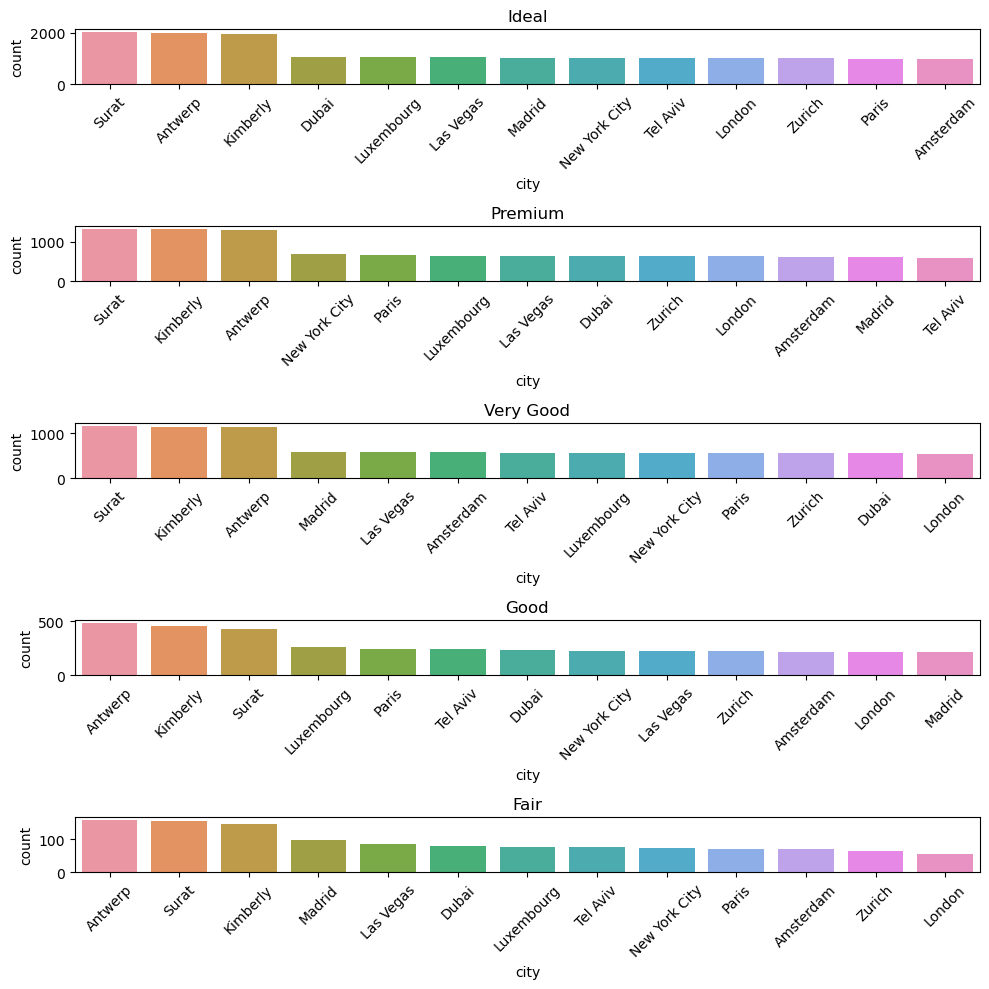

In [33]:
city_cut = diamonds.loc[:, ['city','cut']]
city_cut = pd.DataFrame(city_cut.value_counts()).reset_index(drop=False)
city_cut.rename(columns={0: "count"}, inplace=True)
df_cut = [city_cut[city_cut['cut'] == i].sort_values(by = 'count',ascending=False) for i in list(city_cut['cut'].unique())]

# create four bar charts
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
sns.barplot(x="city", y="count", data=df_cut[0], ax=axs[0])
sns.barplot(x="city", y="count", data=df_cut[1], ax=axs[1])
sns.barplot(x="city", y="count", data=df_cut[2], ax=axs[2])
sns.barplot(x="city", y="count", data=df_cut[3], ax=axs[3])
sns.barplot(x="city", y="count", data=df_cut[4], ax=axs[4])


# set x-axis labels and titles for each subplot
axs[0].set_xticklabels(df_cut[0]['city'], rotation=45)
axs[0].set_title(df_cut[0]['cut'].unique()[0])
axs[1].set_xticklabels(df_cut[1]['city'], rotation=45)
axs[1].set_title(df_cut[1]['cut'].unique()[0])
axs[2].set_xticklabels(df_cut[2]['city'], rotation=45)
axs[2].set_title(df_cut[2]['cut'].unique()[0])
axs[3].set_xticklabels(df_cut[3]['city'], rotation=45)
axs[3].set_title(df_cut[3]['cut'].unique()[0])
axs[4].set_xticklabels(df_cut[4]['city'], rotation=45)
axs[4].set_title(df_cut[4]['cut'].unique()[0])


# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


In [40]:
diamonds_clarity = diamonds.groupby(['clarity'], as_index=False).mean(numeric_only=True)
diamonds_clarity

,clarity,price,carat,depth,table,x,y,z
0,I1,3971.206039,1.299591,62.804796,58.237478,6.782771,6.729485,4.227318
1,IF,2797.897513,0.499849,61.511454,56.496684,4.953451,4.975011,3.052427
2,SI1,3999.856908,0.851174,61.859668,57.648549,5.888604,5.888270,3.639990
3,SI2,5101.044307,1.081472,61.779954,57.909150,6.408255,6.407433,3.952679
4,VS1,3796.813551,0.721553,61.678948,57.285410,5.555437,5.562798,3.428205
5,VS2,3913.590182,0.762661,61.721345,57.404520,5.655557,5.656696,3.489658
6,VVS1,2559.498558,0.506994,61.606921,56.929740,4.973554,4.988504,3.068893
7,VVS2,3240.978942,0.591777,61.658884,57.031561,5.206976,5.220753,3.213917
